Text(0.5, 1.0, 'Transformed Image')

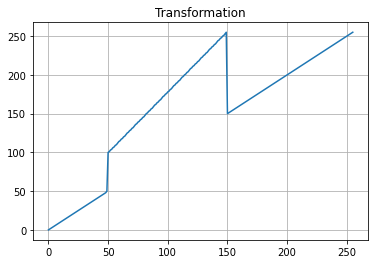

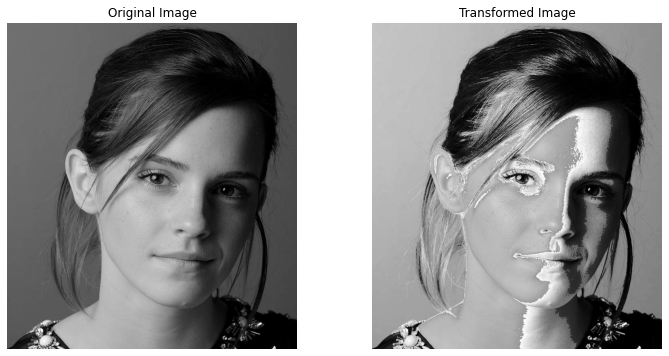

In [45]:
#Q1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_1 = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img_1 is not None

trans_1 = np.linspace(0,50,50)
trans_2 = np.linspace(100,255,100)
trans_3 = np.linspace(150,255,106)
trans = np.concatenate([trans_1, trans_2, trans_3], axis=0).astype(np.uint8)
assert len(trans) == 256

fig1, ax = plt.subplots()
ax.plot(trans)
ax.grid()
ax.set_title('Transformation')

trans_img = cv.LUT(img_1, trans)

fig2, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].imshow(img_1, cmap = 'gray', vmin =0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(trans_img, cmap = 'gray', vmin =0, vmax=255)
ax[1].axis('off')
ax[1].set_title('Transformed Image')


Text(0.5, 1.0, 'Transformation to accentuate grey matter')

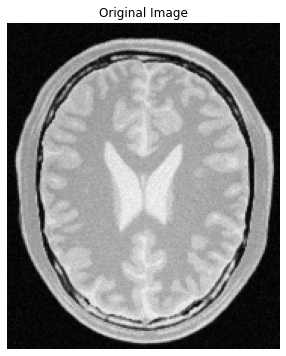

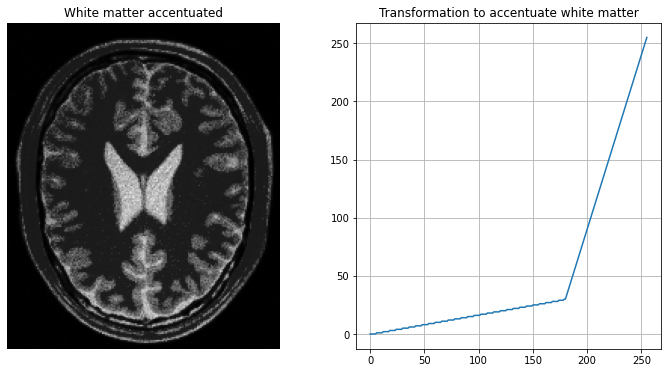

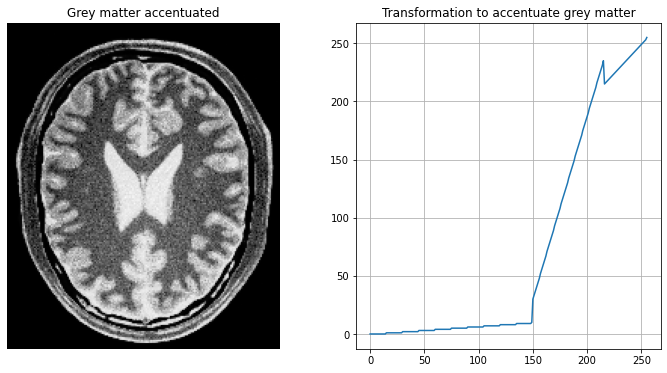

In [46]:
#Q2

img_2 = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_2 is not None

fig1, ax = plt.subplots(figsize=(6,6))
ax.imshow(img_2, cmap = 'gray', vmin =0, vmax=255)
ax.axis('off')
ax.set_title('Original Image')

#a) accentuate white matter
trans_1_white = np.linspace(0, 30, 180)  
trans_2_white = np.linspace(30, 255, 76)
trans_white = np.concatenate([trans_1_white, trans_2_white], axis=0).astype(np.uint8)
assert len(trans_white) == 256

white_matter = cv.LUT(img_2, trans_white)

fig2, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(white_matter, cmap = 'gray', vmin =0, vmax=255)
ax[0].axis('off')
ax[0].set_title('White matter accentuated')

ax[1].plot(trans_white)
ax[1].grid()
ax[1].set_title('Transformation to accentuate white matter')

#b) accentuate grey matter
trans_1_grey = np.linspace(0, 10, 150) 
trans_2_grey = np.linspace(30, 235 ,66)
trans_3_grey = np.linspace(215,255,40)
trans_grey = np.concatenate([trans_1_grey, trans_2_grey, trans_3_grey], axis=0).astype(np.uint8)
assert len(trans_grey) == 256

grey_matter = cv.LUT(img_2, trans_grey)

fig3, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(grey_matter, cmap = 'gray', vmin =0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Grey matter accentuated')

ax[1].plot(trans_grey)
ax[1].grid()
ax[1].set_title('Transformation to accentuate grey matter')


(array([2.0560e+03, 0.0000e+00, 8.0000e+00, 0.0000e+00, 7.0000e+00,
        3.4100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 9.3000e+01, 1.4010e+03,
        2.7900e+02, 2.1770e+03, 1.5700e+02, 6.4000e+01, 2.1400e+02,
        0.0000e+00, 2.1030e+03, 1.4700e+02, 1.8560e+03, 3.9700e+03,
        3.6010e+03, 2.0500e+02, 1.8820e+03, 1.5680e+03, 2.9300e+02,
        2.8300e+03, 3.0900e+03, 1.1600e+02, 2.0000e+00, 1.7300e+02,
        4.7000e+01, 1.9640e+03, 3.9090e+03, 3.3560e+03, 5.2970e+03,
        6.4050e+03, 4.6790e+03, 7.7600e+02, 7.5950e+03, 9.0050e+03,
        4.9130e+03, 5.5340e+03, 1.0316e+04, 6.0890e+03, 5.8720e+03,
        1.1805e+04, 1.0988e+04, 7.7420e+03, 6.56

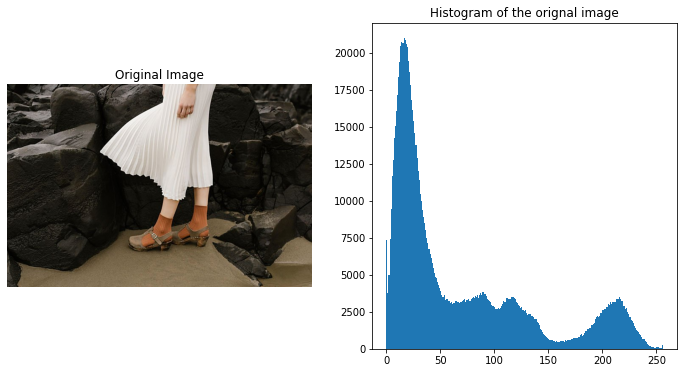

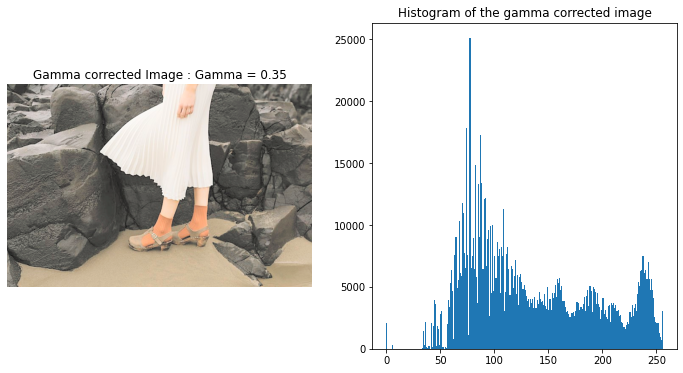

In [59]:
#Q3

img_3 = cv.imread(r'highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img_3 is not None

img_3_lab = cv.cvtColor(img_3, cv.COLOR_BGR2LAB)
L = img_3_lab[:,:,0]

fig1, ax = plt.subplots(1,2, figsize=(12,6))
img_3_rgb = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
ax[0].imshow(img_3_rgb)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].set_title('Histogram of the orignal image')
ax[1].hist(img_3_rgb.flatten(), 256, [0, 256])

gamma = 0.35

correction = np.array([(i/255)**gamma*255 for i in range(0, 256)]).astype(np.uint8)
corrected = cv.LUT(L, correction)
img_3_lab[:,:,0] = corrected
corrected_rgb = cv.cvtColor(img_3_lab, cv.COLOR_LAB2RGB)

fig2, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(corrected_rgb)
ax[0].axis('off')
ax[0].set_title('Gamma corrected Image : Gamma = '+ str(gamma))

ax[1].set_title('Histogram of the gamma corrected image')
ax[1].hist(corrected_rgb.flatten(), 256, [0, 256])